In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

In [2]:
%run ./ml_model_init.ipynb

## Baseline Model


In [ ]:
#
sv_data= data[(data['minutes_5'] >= 300) & (data['position'] == 'GK')][['position',  'minutes_3', 'team_h_difficulty', 'team_a_difficulty', 'was_home',
                                                                         'ict_index_3',  'influence_3',  'creativity_3',  'threat_3',
                                                                          'clean_sheets_3',  'expected_goals_conceded_3','saves',
                                                                           'saves_5', 'whh', 'whd', 'wha']]

# [['position', 'minutes_3', 'minutes_5', 'team_h_difficulty', 'team_a_difficulty', 'was_home', 'ict_index_3',
#                                                                          'ict_index_5', 'influence_3', 'influence_5', 'creativity_3', 'creativity_5', 'threat_3', 'threat_5',
#                                                                          'clean_sheets_3', 'clean_sheets_5', 'expected_goals_conceded_3', 'expected_goals_conceded_5','saves',
#                                                                           'saves_3', 'saves_5', 'whh', 'whd', 'wha']]

sv_data_tar = data_tar[(data_tar['minutes_5'] >= 300) & (data_tar['position'] == 'GK')][['position',  'minutes_5', 'team_h_difficulty', 'team_a_difficulty', 'was_home',
                                                                         'ict_index_3',  'influence_3',  'creativity_3',  'threat_3',
                                                                          'clean_sheets_3',  'expected_goals_conceded_3','saves',
                                                                           'saves_3', 'whh', 'whd', 'wha']]

# [['position', 'minutes_3', 'minutes_5', 'team_h_difficulty', 'team_a_difficulty', 'was_home', 'ict_index_3',
#                                                                          'ict_index_5', 'influence_3', 'influence_5', 'creativity_3', 'creativity_5', 'threat_3', 'threat_5',
#                                                                          'clean_sheets_3', 'clean_sheets_5', 'expected_goals_conceded_3', 'expected_goals_conceded_5','saves',
#                                                                           'saves_3', 'saves_5', 'whh', 'whd', 'wha']]

# players = data_225 #.drop('position', axis=1) #  & (data['position'] == 'FWD')
# # players


In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(sv))[0].unique()

array([-0.47667773,  0.02787256,  0.53242286, -0.98122803,  2.04607376,
       -1.48577833,  1.03697316,  1.54152346,  2.55062406,  3.05517436,
        4.06427496,  3.55972466])

In [69]:

sv = sv_data[['saves']]
feats = sv_data.drop(['saves', 'position'], axis=1)
feats_train, feats_test, sv_train, sv_test = train_test_split(feats, sv , test_size=0.2, random_state=42)

<Axes: xlabel='saves'>

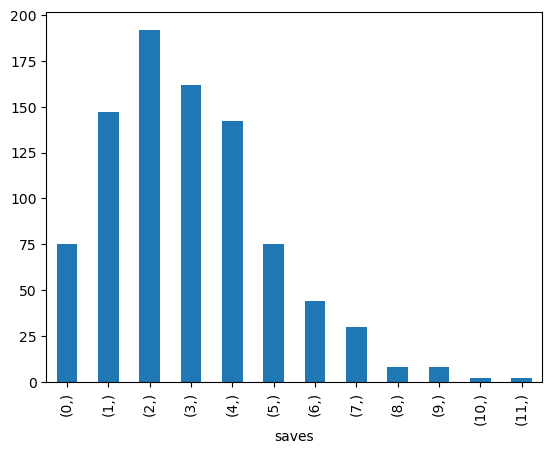

In [115]:
sv.value_counts(sort=False).plot.bar()

In [ ]:
import matplotlib.pyplot as plt

# Plot
df.plot.bar(x="Category", y="Values", legend=False)

# Customize
plt.title("Bar Plot Example")
plt.xlabel("Category")
plt.ylabel("Values")
plt.show()

,saves
58,2
59,3
60,2
61,2
62,2
...,...
1964,4
1965,8
1966,3
1967,1


#### Linear Model


In [112]:
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import column_or_1d
# Split dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Poisson regression
pr = PoissonRegressor(alpha=1.0)
pr.fit(feats_train, column_or_1d(sv_train))

# Prediction
y_pred = pr.predict(feats_test)


c:\Users\Ilyas\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\glm.py:294: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [107]:
 # With the pr fitted, we can predict the total_points given the feature_train and feature_test set
pred_train = pr.predict(feats_train)
pred_test = pr.predict(feats_test)

# Evaluate the performance of the pr on both sets using the mean absolute error
train_MAE = mean_absolute_error(sv_train, pred_train)
test_MAE = mean_absolute_error(sv_test, pred_test)

# Evaluate the performance of the model on both sets using the mean square error
train_MSE = mean_squared_error(sv_train, pred_train)
test_MSE = mean_squared_error(sv_test, pred_test)

# Evaluate the performance of the model on both sets using the root mean square error
train_RMSE = mean_squared_error(sv_train, pred_train, squared=False)
test_RMSE = mean_squared_error(sv_test, pred_test, squared=False)

# Get the score of the model or the coeeficient of determination i.e how much of the target value can be explained by the model.
# In this case, 0.6 implies that 60% of the variations in the target value can be explained by the model and 40% is not explainable
R2_train = pr.score(feats_train, column_or_1d(sv_train))
R2_test = pr.score(feats_test, column_or_1d(sv_test))

In [109]:
print(train_MAE, test_MAE)
print(train_MSE, test_MSE)
print(train_RMSE, test_RMSE)
print(R2_train, R2_test)

1.5271427582797945 1.5256892973855523
3.6297421045168488 4.082993001832578
1.9051882071115307 2.0206417302017146
0.052574900973456185 0.02779189293026818


In [71]:

lin_reg = Linear_regression(feats_train, feats_test, sv_train, sv_test)

# Store the model evaluation details in a DataFrame
evaluation_stats = pd.DataFrame({"lin_reg": [lin_reg['train_MAE'], lin_reg['test_MAE'], lin_reg['train_RMSE'], lin_reg['test_RMSE'], lin_reg['cv_rmse'], lin_reg['R2_train'], lin_reg['R2_test']]},
                                                        index=(['train_MAE','test_MAE', 'train_RMSE', 'test_RMSE', 'cv_rmse', 'R2_train', 'R2_test']))

evaluation_stats

Training set RMSE: 1.9099909131543522
Test set RMSE: 2.046092791347074
Training set R2: 0.05460978459809773
Test set R2: 0.003718415945131337


,lin_reg
train_MAE,1.527215
test_MAE,1.554831
train_RMSE,1.909991
test_RMSE,2.046093
cv_rmse,1.944569
R2_train,0.054610
R2_test,0.003718


#### DecisionTree Model


In [72]:
dt_reg = DecisionTreeRegression(feats_train, feats_test, sv_train, sv_test)

# Store the model evaluation details in a DataFrame
evaluation_stats = evaluation_stats.assign(dt_reg = [dt_reg['train_MAE'], dt_reg['test_MAE'], dt_reg['train_RMSE'], dt_reg['test_RMSE'], dt_reg['cv_rmse'], dt_reg['R2_train'], dt_reg['R2_test']])

evaluation_stats



,lin_reg,dt_reg
train_MAE,1.527215,0.000000
test_MAE,1.554831,2.174157
train_RMSE,1.909991,0.000000
test_RMSE,2.046093,2.809494
cv_rmse,1.944569,2.874402
R2_train,0.054610,1.000000
R2_test,0.003718,-0.878399


#### RandomForest Model


In [67]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
rf_reg = RandomForestRegression(feats_train, feats_test, sv_train, sv_test, hyperparameters)

# Store the model evaluation details in a DataFrame
evaluation_stats = evaluation_stats.assign(rf_reg = [rf_reg['train_MAE'], rf_reg['test_MAE'], rf_reg['train_RMSE'], rf_reg['test_RMSE'], rf_reg['cv_rmse'], rf_reg['R2_train'], rf_reg['R2_test']])

evaluation_stats

,lin_reg,dt_reg,rf_reg
train_MAE,1.531599,3.444980e-18,1.126027
test_MAE,1.550873,2.129213e+00,1.547219
train_RMSE,1.910315,2.765753e-17,1.406790
test_RMSE,2.035782,2.730395e+00,2.042450
cv_rmse,1.942418,2.746350e+00,1.959031
R2_train,0.054289,1.000000e+00,0.487130
R2_test,0.013734,-7.741175e-01,0.007263


#### XgBoost Model


In [51]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
xgb_reg = XGBoostRegression(feats_train, feats_test, sv_train, sv_test, hyperparameters)

# Store the model evaluation details in a DataFrame
evaluation_stats = evaluation_stats.assign(xgb_reg = [xgb_reg['train_MAE'], xgb_reg['test_MAE'], xgb_reg['train_RMSE'], xgb_reg['test_RMSE'], xgb_reg['cv_rmse'], xgb_reg['R2_train'], xgb_reg['R2_test']])
evaluation_stats

,lin_reg,dt_reg,rf_reg,xgb_reg
train_MAE,1.525666,4.697700e-18,1.133039,1.273074
test_MAE,1.568869,2.174157e+00,1.571922,1.540032
train_RMSE,1.901873,3.229704e-17,1.408320,1.595576
test_RMSE,2.045688,2.678462e+00,2.045427,2.035367
cv_rmse,1.955917,2.788767e+00,1.999656,1.983559
R2_train,0.062629,1.000000e+00,0.486014,0.340244
R2_test,0.004113,-7.072705e-01,0.004367,0.014137


# Feature engineering


### VarianceThreshold


In [52]:
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd

# Feature preprocessing pipeline
# Split into numerical and categorical columns
bool_cols = feats_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = feats_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors in a column transformer
col_trans = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, bool_cols),
        ('cat', categorical_transformer, categorical_cols),
    ]
)

# Scale and remove low-variance features
preprocessor = Pipeline(steps=[
    ('col_trans', col_trans),
    ('var_threshold', VarianceThreshold(threshold=0.1))
])




#### Model(VT)


In [53]:
def scores(model, feats_train, feats_test, sv_train, sv_test):
    # fit the transofrmer on the train data
    model.fit(feats_train, sv_train)

    support = model.regressor_.named_steps['preprocessor'].named_steps['var_threshold'].get_support()
    # print(f"Selected features: {feats_train.columns[support]}")
    print(len(support), len(feats_train.columns))

    # With the model fitted, we can predict the total_points given the feature_train and feature_test set
    pred_train = model.predict(feats_train)
    pred_test = model.predict(feats_test)

    # Evaluate the performance of the model on both sets using the mean absolute error
    train_MAE = mean_absolute_error(sv_train, pred_train)
    test_MAE = mean_absolute_error(sv_test, pred_test)

    # Evaluate the performance of the model on both sets using the mean square error
    train_MSE = mean_squared_error(sv_train, pred_train)
    test_MSE = mean_squared_error(sv_test, pred_test)

    # Evaluate the performance of the model on both sets using the root mean square error
    train_RMSE = mean_squared_error(sv_train, pred_train, squared=False)
    test_RMSE = mean_squared_error(sv_test, pred_test, squared=False)

    # Get the score of the model or the coeeficient of determination i.e how much of the target value can be explained by the model.
    # In this case, 0.6 implies that 60% of the variations in the target value can be explained by the model and 40% is not explainable
    R2_train = model.score(feats_train, sv_train)
    R2_test = model.score(feats_test, sv_test)

    # If the test error significantly differs from the train error, then there is either overfitting or underfitting
    # RMSE, just like the squared loss function that it derives from, effectively penalizes larger errors more severely.
    print('Training set RMSE: {}'.format(train_RMSE))
    print('Test set RMSE: {}'.format(test_RMSE))

    print('Training set R2: {}'.format(R2_train))
    print('Test set R2: {}'.format(R2_test))

    # Carry out cross validation of the model.
    # The evaluation method is the root mean square error
    # The method expects a utility function (greater is better) and so the scoring function is the opposite of the the RMSE. Hence the -ve
    tree_rmses = -cross_val_score(model, feats_train, sv_train,
                                    scoring="neg_root_mean_squared_error", cv=10)

    return {'train_MAE': train_MAE, 'test_MAE': test_MAE, 'train_MSE': train_MSE, 'test_MSE': test_MSE, 'train_RMSE': train_RMSE, 'test_RMSE': test_RMSE, 'cv_rmse': tree_rmses.mean(), 'R2_train': R2_train, 'R2_test': R2_test}


##### Linear Model


In [54]:

# Full pipeline including the regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# TransformedTargetRegressor for target scaling
model = TransformedTargetRegressor(
    regressor=pipeline,
    transformer=StandardScaler()
)

# Model predictions
VarT_lin_reg = scores(model, feats_train, feats_test, sv_train, sv_test)
# Store the model evaluation details in a DataFrame
evaluation_stats = evaluation_stats.assign(VarT_lin_reg =  [VarT_lin_reg['train_MAE'], VarT_lin_reg['test_MAE'],  VarT_lin_reg['train_RMSE'], VarT_lin_reg['test_RMSE'], VarT_lin_reg['cv_rmse'], VarT_lin_reg['R2_train'], VarT_lin_reg['R2_test']])

evaluation_stats

21 22
Training set RMSE: 1.9018734155864665
Test set RMSE: 2.045687516840249
Training set R2: 0.06262856098901493
Test set R2: 0.0041130486242971775


,lin_reg,dt_reg,rf_reg,xgb_reg,VarT_lin_reg
train_MAE,1.525666,4.697700e-18,1.133039,1.273074,1.525666
test_MAE,1.568869,2.174157e+00,1.571922,1.540032,1.568869
train_RMSE,1.901873,3.229704e-17,1.408320,1.595576,1.901873
test_RMSE,2.045688,2.678462e+00,2.045427,2.035367,2.045688
cv_rmse,1.955917,2.788767e+00,1.999656,1.983559,1.955917
R2_train,0.062629,1.000000e+00,0.486014,0.340244,0.062629
R2_test,0.004113,-7.072705e-01,0.004367,0.014137,0.004113


##### DecisionTree Model


In [55]:
# Full pipeline including the regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor())
])

# TransformedTargetRegressor for target scaling
dt_model = TransformedTargetRegressor(
    regressor=pipeline,
    transformer=StandardScaler()
)




VarT_dt_reg = scores(dt_model, feats_train, feats_test, sv_train, sv_test)

# Store the model evaluation details in a DataFrame
evaluation_stats = evaluation_stats.assign(VarT_dt_reg = [VarT_dt_reg['train_MAE'], VarT_dt_reg['test_MAE'], VarT_dt_reg['train_RMSE'], VarT_dt_reg['test_RMSE'], VarT_dt_reg['cv_rmse'], VarT_dt_reg['R2_train'], VarT_dt_reg['R2_test']])

evaluation_stats



21 22
Training set RMSE: 3.2297041191704293e-17
Test set RMSE: 2.619074371184933
Training set R2: 1.0
Test set R2: -0.6324019828751692


,lin_reg,dt_reg,rf_reg,xgb_reg,VarT_lin_reg,VarT_dt_reg
train_MAE,1.525666,4.697700e-18,1.133039,1.273074,1.525666,4.697700e-18
test_MAE,1.568869,2.174157e+00,1.571922,1.540032,1.568869,2.061798e+00
train_RMSE,1.901873,3.229704e-17,1.408320,1.595576,1.901873,3.229704e-17
test_RMSE,2.045688,2.678462e+00,2.045427,2.035367,2.045688,2.619074e+00
cv_rmse,1.955917,2.788767e+00,1.999656,1.983559,1.955917,2.814695e+00
R2_train,0.062629,1.000000e+00,0.486014,0.340244,0.062629,1.000000e+00
R2_test,0.004113,-7.072705e-01,0.004367,0.014137,0.004113,-6.324020e-01


##### RandomForest Model


In [56]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}

# Full pipeline including the regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
                        n_estimators=hyperparameters['n_estimators'],
                        max_depth=hyperparameters['max_depth'],
                        criterion=hyperparameters['criterion'], random_state=18
                        ))
])

# TransformedTargetRegressor for target scaling
rf_model = TransformedTargetRegressor(
    regressor=pipeline,
    transformer=StandardScaler()
)
# Store the model evaluation details in a DataFrame
VarT_rf_reg = scores(rf_model, feats_train, feats_test, sv_train, sv_test)

# Store the model evaluation details in a DataFrame
evaluation_stats = evaluation_stats.assign(VarT_rf_reg = [VarT_rf_reg['train_MAE'], VarT_rf_reg['test_MAE'], VarT_rf_reg['train_RMSE'], VarT_rf_reg['test_RMSE'], VarT_rf_reg['cv_rmse'], VarT_rf_reg['R2_train'], VarT_rf_reg['R2_test']])
evaluation_stats

21 22
Training set RMSE: 1.408320391548587
Test set RMSE: 2.0454270285570857
Training set R2: 0.4860138267131494
Test set R2: 0.004366655652337292


,lin_reg,dt_reg,rf_reg,xgb_reg,VarT_lin_reg,VarT_dt_reg,VarT_rf_reg
train_MAE,1.525666,4.697700e-18,1.133039,1.273074,1.525666,4.697700e-18,1.133039
test_MAE,1.568869,2.174157e+00,1.571922,1.540032,1.568869,2.061798e+00,1.571922
train_RMSE,1.901873,3.229704e-17,1.408320,1.595576,1.901873,3.229704e-17,1.408320
test_RMSE,2.045688,2.678462e+00,2.045427,2.035367,2.045688,2.619074e+00,2.045427
cv_rmse,1.955917,2.788767e+00,1.999656,1.983559,1.955917,2.814695e+00,1.999656
R2_train,0.062629,1.000000e+00,0.486014,0.340244,0.062629,1.000000e+00,0.486014
R2_test,0.004113,-7.072705e-01,0.004367,0.014137,0.004113,-6.324020e-01,0.004367


##### XgBoost Model


In [57]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}

# Full pipeline including the regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb(learning_rate=hyperparameters["learning_rate"],
                    n_estimators=hyperparameters["n_estimators"],
                    max_depth=hyperparameters["max_depth"],
                    eval_metric='rmsle'))
])

# TransformedTargetRegressor for target scaling
rf_model = TransformedTargetRegressor(
    regressor=pipeline,
    transformer=StandardScaler()
)

VarT_xgb_reg = scores(rf_model, feats_train, feats_test, sv_train, sv_test)



# Store the model evaluation details in a DataFrame
evaluation_stats = evaluation_stats.assign(VarT_xgb_reg = [VarT_xgb_reg['train_MAE'], VarT_xgb_reg['test_MAE'], VarT_xgb_reg['train_RMSE'], VarT_xgb_reg['test_RMSE'], VarT_xgb_reg['cv_rmse'], VarT_xgb_reg['R2_train'], VarT_xgb_reg['R2_test']])
evaluation_stats

21 22
Training set RMSE: 1.595576043161618
Test set RMSE: 2.0353666914544806
Training set R2: 0.34024374725296325
Test set R2: 0.014136522111071859


,lin_reg,dt_reg,rf_reg,xgb_reg,VarT_lin_reg,VarT_dt_reg,VarT_rf_reg,VarT_xgb_reg
train_MAE,1.525666,4.697700e-18,1.133039,1.273074,1.525666,4.697700e-18,1.133039,1.273074
test_MAE,1.568869,2.174157e+00,1.571922,1.540032,1.568869,2.061798e+00,1.571922,1.540032
train_RMSE,1.901873,3.229704e-17,1.408320,1.595576,1.901873,3.229704e-17,1.408320,1.595576
test_RMSE,2.045688,2.678462e+00,2.045427,2.035367,2.045688,2.619074e+00,2.045427,2.035367
cv_rmse,1.955917,2.788767e+00,1.999656,1.983559,1.955917,2.814695e+00,1.999656,1.983559
R2_train,0.062629,1.000000e+00,0.486014,0.340244,0.062629,1.000000e+00,0.486014,0.340244
R2_test,0.004113,-7.072705e-01,0.004367,0.014137,0.004113,-6.324020e-01,0.004367,0.014137
